20180312

In [1]:
#import tensorflowas tf
import keras

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn import datasets
def load_data(size):
    mnist = datasets.fetch_mldata('MNIST original')
    s = mnist.data.shape[0]
    c = np.zeros(s)
    c[np.random.choice(s,size,replace=False)] = 1
    #n_train = size
    data_train = mnist.data[c==1]
    target_train = mnist.target[c==1]
    data_test = mnist.data[c==0]
    target_test = mnist.target[c==0]
    return (data_train.astype(np.float32), target_train.astype(np.float32),data_test.astype(np.float32), target_test.astype(np.float32))


In [4]:
(x_train,t_train,x_test,t_test) = load_data(20000)

In [5]:
t_train_2 = keras.utils.to_categorical(t_train, num_classes=10)
t_test_2 = keras.utils.to_categorical(t_test, num_classes=10)
x_train_2 = (x_train/255).reshape(x_train.shape[0],28,28,-1)
x_test_2 = (x_test/255).reshape(x_test.shape[0],28,28,-1)

In [6]:
x_test_2.shape

(50000, 28, 28, 1)

In [7]:
iters_num = 10000
batch_size = 100
epochs = 50

In [8]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation
from keras.callbacks import TensorBoard


model = Sequential()
model.add(Conv2D(16, (3,3), strides=(1, 1),input_shape=(28,28,1),padding='same',activation='relu', use_bias=True, bias_initializer='zeros'))
model.add(Conv2D(16, (3,3), strides=(1, 1),padding='same',activation='relu', use_bias=True, bias_initializer='zeros'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))
model.add(Conv2D(32, (3,3), strides=(1, 1),padding='same',activation='relu', use_bias=True, bias_initializer='zeros'))
model.add(Conv2D(32, (3,3), strides=(1, 1),padding='same',activation='relu', use_bias=True, bias_initializer='zeros'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))
model.add(Conv2D(64, (3,3), strides=(1, 1),padding='same',activation='relu', use_bias=True, bias_initializer='zeros'))
model.add(Conv2D(64, (3,3), strides=(1, 1),padding='same',activation='relu', use_bias=True, bias_initializer='zeros'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))



model.add(Flatten())
model.add(Dense(units=50, activation='relu', use_bias=True)) #output = 100
model.add(Dropout(rate=0.5))
model.add(Dense(units=10, use_bias=True)) #output = 10
model.add(Dropout(rate=0.5))
model.add(Activation('softmax'))
model.summary()  #列出模型概況
sgd = SGD(lr=0.01, momentum=0, nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
#model.fit(x_train_2, t_train_2, epochs=epochs, batch_size=batch_size)


#tb = TensorBoard(log_dir='logs', histogram_freq=10, batch_size=batch_size,
#                           write_graph=True, write_grads=True, write_images=True,
#                           embeddings_freq=10, embeddings_metadata=None)
#history = model.fit(x_train_2, t_train_2,batch_size=batch_size, epochs=epochs,callbacks=[tb],verbose=1, validation_data=(x_test_2, t_test_2))

history = model.fit(x_train_2, t_train_2,
                    batch_size=batch_size, epochs=epochs,
                    callbacks=[TensorBoard(histogram_freq=1)],
                    verbose=1, validation_data=(x_test_2, t_test_2))

Train on 20000 samples, validate on 50000 samples
Epoch 1/50
20000/20000 [==============================] - 85s 4ms/step - loss: 2.2918 - acc: 0.1412 - val_loss: 2.2755 - val_acc: 0.3243
Epoch 2/50
20000/20000 [==============================] - 81s 4ms/step - loss: 2.2191 - acc: 0.2193 - val_loss: 1.9726 - val_acc: 0.6014
Epoch 3/50
20000/20000 [==============================] - 75s 4ms/step - loss: 1.8203 - acc: 0.3555 - val_loss: 1.2043 - val_acc: 0.8268
Epoch 4/50
20000/20000 [==============================] - 75s 4ms/step - loss: 1.5567 - acc: 0.4360 - val_loss: 0.8130 - val_acc: 0.8775
Epoch 5/50
20000/20000 [==============================] - 74s 4ms/step - loss: 1.4154 - acc: 0.4765 - val_loss: 0.6918 - val_acc: 0.8887
Epoch 6/50
20000/20000 [==============================] - 74s 4ms/step - loss: 1.3120 - acc: 0.5040 - val_loss: 0.4548 - val_acc: 0.9245
Epoch 7/50
20000/20000 [==============================] - 74s 4ms/step - loss: 1.2625 - acc: 0.5156 - val_loss: 0.3701 - val_acc

In [ ]:
#score = model.evaluate(x_test_2, t_test_2, batch_size=batch_size)

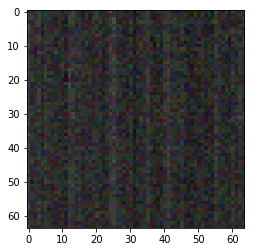

In [48]:
t = np.array(model.layers[7].get_weights()[0])[0] + np.array(model.layers[7].get_weights()[1])
t2 = t  - np.min(t)
plt.imshow(t2.transpose((1,2,0)))
plt.show()

In [47]:
np.array(model.layers[7].get_weights()[0]).shape

(3, 3, 64, 64)

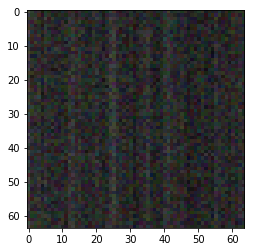

In [49]:
t = np.array(model.layers[7].get_weights()[0])[1] + np.array(model.layers[7].get_weights()[1])
t2 = t  - np.min(t)
plt.imshow(t2.transpose((1,2,0)))
plt.show()

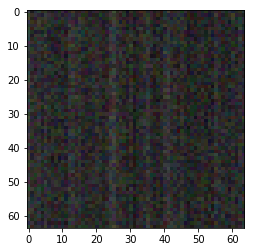

In [50]:
t = np.array(model.layers[7].get_weights()[0])[2] + np.array(model.layers[7].get_weights()[1])
t2 = t  - np.min(t)
plt.imshow(t2.transpose((1,2,0)))
plt.show()